<a href="https://colab.research.google.com/github/jons255-p/Python_Machi_Learning_Sta_Anita/blob/master/Clase_4_Arboles_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arbol de Decisión

In [0]:
import pandas as pd

In [2]:
data = pd.read_csv("Titanic_Limpio.csv")
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
0,0,3,1,1,0,2,4,0,73,11
1,1,1,0,1,0,0,0,3,136,12
2,1,3,0,0,0,2,7,0,251,8
3,1,1,0,1,0,2,7,3,198,12
4,0,3,1,0,0,2,7,1,11,11


In [0]:
x = data.drop('Survived', axis=1) # atributos en x (todas las columnas excepto Survived)
y = data['Survived']    # objetivos

In [4]:
x.head()

,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
0,3,1,1,0,2,4,0,73,11
1,1,0,1,0,0,0,3,136,12
2,3,0,0,0,2,7,0,251,8
3,1,0,1,0,2,7,3,198,12
4,3,1,0,0,2,7,1,11,11


In [6]:
y.head() # solo es una serie

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
x['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

DecisionTreeClassifier toma como entrada dos matrices: una matriz X de tamaño [n_samples, n_features] que contiene las muestras de entrenamiento, y una matriz Y de valores enteros, tamaño [n_samples], que contiene las etiquetas de clase para las muestras de entrenamiento:

In [0]:
from sklearn import tree
m = tree.DecisionTreeClassifier(max_depth=3)  # nivel ==fila del arbol (max_depth)
m = m.fit(x,y)

In [22]:
m.tree_.max_depth  # sin max sale 20 (mayor score 0.99), con max_depth=6 (menor score 0.87)

3

(fraction of correct predictions): correct predictions / total number of data points

In [23]:
m.score(x,y) # predicion de datos en funcion de las datas (la data es la misma) no tiene data de entrenamiento ni data de prediccion

0.8316498316498316

In [24]:
m.predict([x.iloc[8]])

array([0])

[Text(167.4, 190.26, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'), Text(83.7, 135.9, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'), Text(41.85, 81.53999999999999, 'X[7] <= 656.0\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'), Text(20.925, 27.180000000000007, 'gini = 0.09\nsamples = 169\nvalue = [8, 161]'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(125.55000000000001, 81.53999999999999, 'X[4] <= 1.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'), Text(104.625, 27.180000000000007, 'gini = 0.423\nsamples = 56\nvalue = [17, 39]'), Text(146.475, 27.180000000000007, 'gini = 0.469\nsamples = 88\nvalue = [55, 33]'), Text(251.10000000000002, 135.9, 'X[8] <= 9.0\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'), Text(209.25, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.5\nsamples = 53\nvalue = [26, 27]'), Text(188.32500000000002, 27.180000000000007, 'gini = 0.382\nsamples = 35\nvalue = [9, 26]'), Text(230.175, 

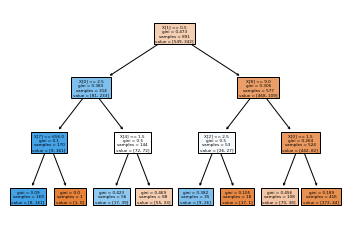

In [25]:
arbol = tree.plot_tree(m.fit(x,y),filled=True)  
print(arbol)

In [27]:
import graphviz 
dot_data = tree.export_graphviz(m,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph
graph.render("arbol",format='png') 

'arbol.png'

Arbol de decision mayor

In [0]:
from sklearn import tree
m = tree.DecisionTreeClassifier(max_depth=8)  # nivel ==fila del arbol (max_depth)
m = m.fit(x,y)

In [29]:
m.tree_.max_depth 

8

In [30]:
m.score(x,y)

0.9102132435465768

In [31]:
m.predict([x.iloc[8]])

array([0])

In [32]:
import graphviz 
dot_data = tree.export_graphviz(m,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph
graph.render("arbol",format='png')

'arbol.png'

In [33]:
x.sample()

,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
712,1,1,1,0,2,0,3,596,11


In [36]:
y[712]

1

In [38]:
m.predict([[1,1,1,0,2,0,3,596,11]])

array([1])

In [0]:
sample

Gini= debe disminuir para predecir mejor

Muestra=cantidad=88
valor=[55,33]
P=55/88
G=1-P
Clase=Vivo o muerto
```



Mas grande

**Mayor profundidad --- menor gini**

In [0]:
from sklearn import tree
m = tree.DecisionTreeClassifier(max_depth=20)  # nivel ==fila del arbol (max_depth)
m = m.fit(x,y)

In [40]:
m.score(x,y)

0.9988776655443322

In [41]:
import graphviz 
dot_data = tree.export_graphviz(m,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph
graph.render("arbol",format='png')

'arbol.png'